C:\Users\Guddu\AppData\Local\Temp\ipykernel_6032\3793716874.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Sales'].sum()


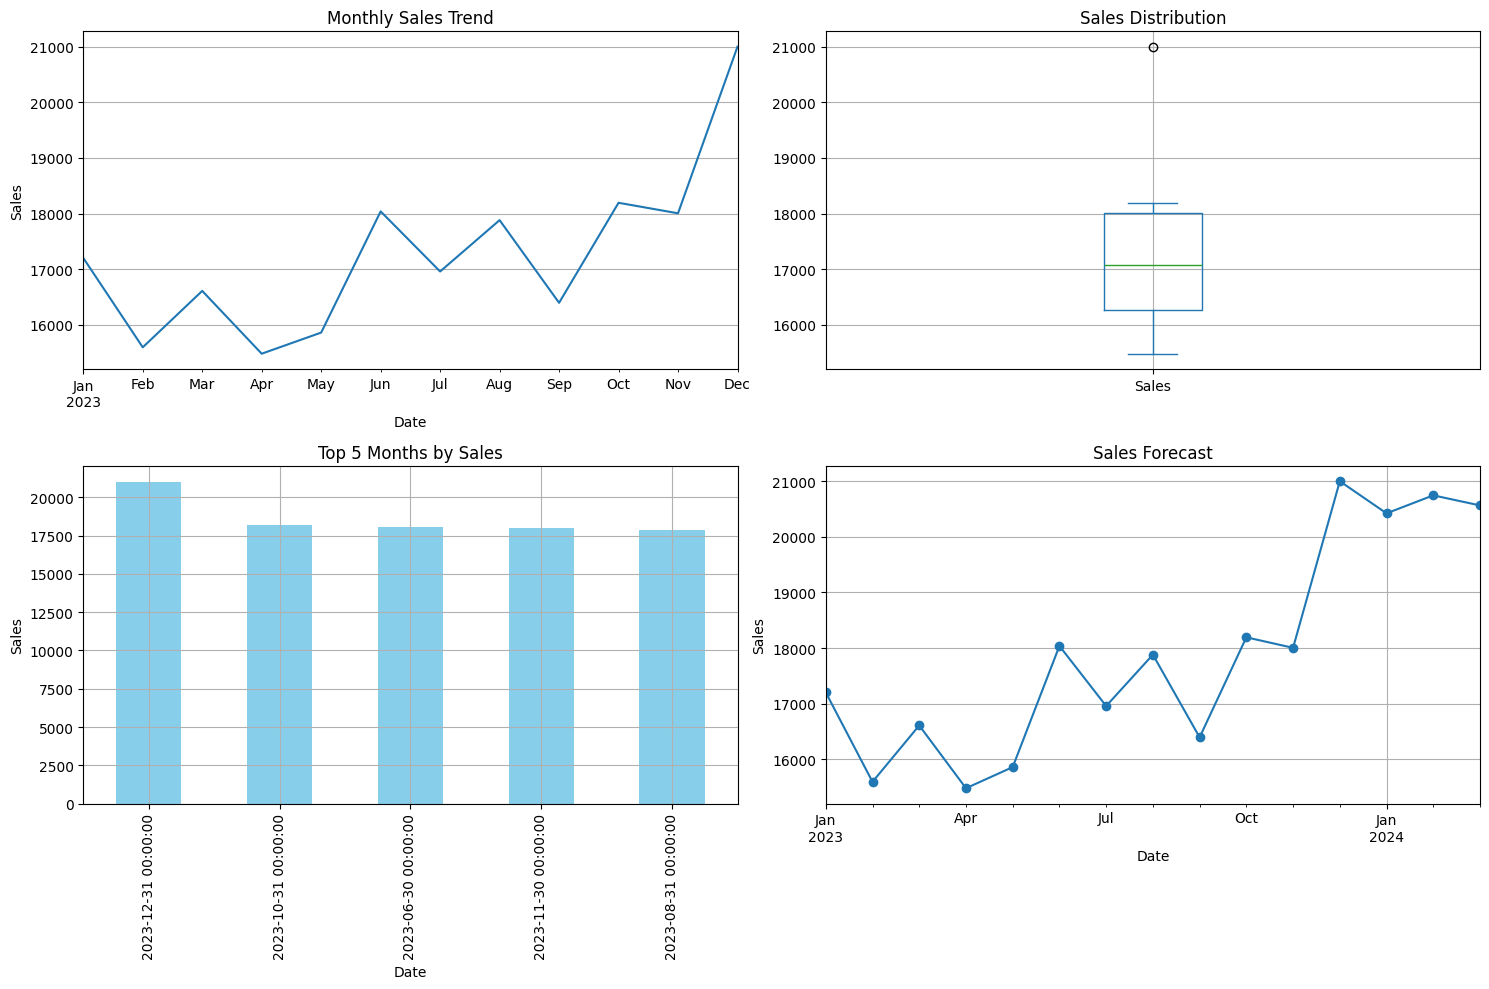

Total Sales: $207,214.00
Average Monthly Sales: $17,267.83
Forecasted Sales for Next 3 Months: $61,730.87


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Load sample sales data
def load_sample_data():
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
    sales = pd.Series(np.random.randint(100, 1000, size=len(dates)), index=dates)
    df = pd.DataFrame({'Date': dates, 'Sales': sales.values})
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Analyze sales trends
def analyze_sales_trends(df):
    df.set_index('Date', inplace=True)
    monthly_sales = df.resample('M')['Sales'].sum()
    return monthly_sales

# Forecast revenue
def forecast_revenue(monthly_sales, periods=3):
    model = ARIMA(monthly_sales, order=(1, 1, 1))
    results = model.fit()
    forecast = results.forecast(steps=periods)
    # Align forecast index with future months
    last_date = monthly_sales.index[-1]
    forecast_index = [last_date + pd.offsets.MonthEnd(i) for i in range(1, periods + 1)]
    forecast = pd.Series(forecast, index=forecast_index)
    return forecast

# Visualize key performance metrics
def visualize_metrics(monthly_sales, forecast):
    plt.figure(figsize=(15, 10))

    # Monthly Sales Trend
    plt.subplot(2, 2, 1)
    monthly_sales.plot()
    plt.title('Monthly Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)

    # Sales Distribution
    plt.subplot(2, 2, 2)
    monthly_sales.plot(kind='box')
    plt.title('Sales Distribution')
    plt.grid(True)

    # Top 5 Months
    plt.subplot(2, 2, 3)
    top_5_months = monthly_sales.nlargest(5)
    top_5_months.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Months by Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)

    # Sales Forecast
    plt.subplot(2, 2, 4)
    combined = pd.concat([monthly_sales, forecast])
    combined.plot(marker='o')
    plt.title('Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main function to run the dashboard
def main():
    # Load data
    df = load_sample_data()

    # Analyze trends
    monthly_sales = analyze_sales_trends(df)

    # Forecast revenue
    forecast = forecast_revenue(monthly_sales)

    # Visualize metrics
    visualize_metrics(monthly_sales, forecast)

    # Print some key metrics
    print(f"Total Sales: ${monthly_sales.sum():,.2f}")
    print(f"Average Monthly Sales: ${monthly_sales.mean():,.2f}")
    print(f"Forecasted Sales for Next 3 Months: ${forecast.sum():,.2f}")

if __name__ == "__main__":
    main()
